#### Importing the libraries

In [1]:
import tensorflow as tf
import pathlib
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#### Create a images dictionary according to there class

In [2]:
data_dir = pathlib.Path('D:\kvasir-dataset')
classes = ['dyed-lifted-polyps','dyed-resection-margins','esophagitis',
             'normal-cecum','normal-pylorus','normal-z-line','polyps','ulcerative-colitis']
images_dict = {class_name:list(data_dir.glob(class_name + '/*')) for class_name in classes}

#### create resized image array (x) and corresponding classes array (y)

In [3]:
X,y = [],[]

for class_name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(64,64))
        X.append(resized_img)
        y.append(classes.index(class_name))
X = np.array(X)
y = np.array(y)

In [4]:
X.shape,y.shape

((4000, 64, 64, 3), (4000,))

#### Divide the dataset for test and train

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#### Data Visualization

In [6]:
def plot_sample(X, y, sample_indexes):
    for index in sample_indexes:
        plt.figure(figsize = (10,2))
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])

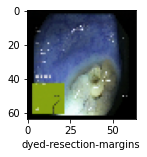

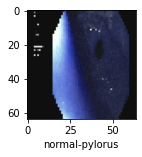

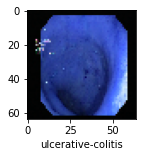

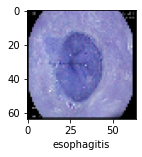

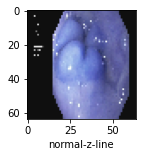

In [7]:
plot_sample(X_train, y_train, range(5))

#### Scale images

In [8]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

#### Build convolutional neural network and train it

In [9]:
num_classes = 8

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
94/94 [==============================] - 13s 121ms/step - loss: 2.0163 - accuracy: 0.2189
Epoch 2/30
94/94 [==============================] - 11s 117ms/step - loss: 1.9326 - accuracy: 0.2595
Epoch 3/30
94/94 [==============================] - 12s 124ms/step - loss: 1.8525 - accuracy: 0.2882
Epoch 4/30
94/94 [==============================] - 11s 121ms/step - loss: 1.7414 - accuracy: 0.3763
Epoch 5/30
94/94 [==============================] - 11s 116ms/step - loss: 1.6712 - accuracy: 0.3753
Epoch 6/30
94/94 [==============================] - 11s 115ms/step - loss: 1.5896 - accuracy: 0.3702
Epoch 7/30
94/94 [==============================] - 11s 120ms/step - loss: 1.5598 - accuracy: 0.3565
Epoch 8/30
94/94 [==============================] - 11s 120ms/step - loss: 1.5008 - accuracy: 0.3605
Epoch 9/30
94/94 [==============================] - 14s 148ms/step - loss: 1.4386 - accuracy: 0.3693
Epoch 10/30
94/94 [==============================] - 12s 124ms/step - loss: 1.4502 - accura

#### Evaluate the model

In [11]:
model.evaluate(X_test_scaled, y_test)

32/32 [==============================] - 2s 35ms/step - loss: 1.1404 - accuracy: 0.3500


[1.1404346227645874, 0.3499999940395355]

#### Classification report

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.98      0.63       127
           1       0.00      0.00      0.00       141
           2       0.00      0.00      0.00       130
           3       0.30      1.00      0.47       110
           4       0.00      0.00      0.00       119
           5       0.31      0.99      0.48       117
           6       0.00      0.00      0.00       121
           7       0.00      0.00      0.00       135

    accuracy                           0.35      1000
   macro avg       0.14      0.37      0.20      1000
weighted avg       0.13      0.35      0.19      1000



C:\Users\dusha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

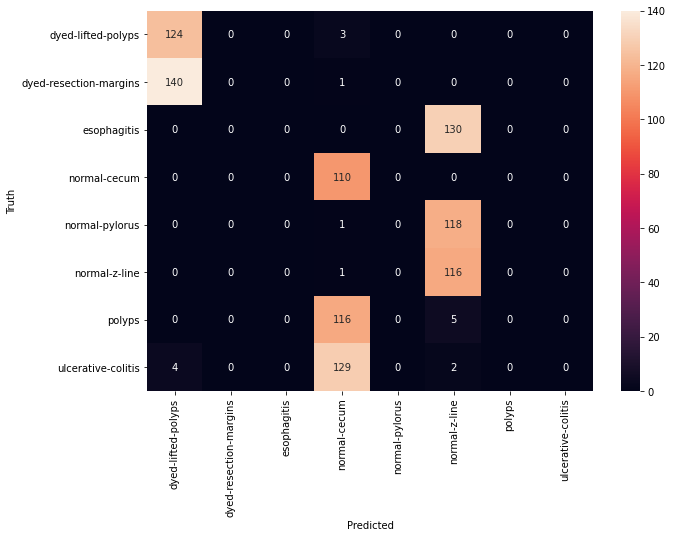

In [13]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(data=cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')